## Data Science And Business Analytics
## The Spark Foundation
### Author : Vaibhav Vispute
### Task 2
#### Prediction Using unsupervised ML
#### Predict the optimum number of cluserters and represent it visually

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

### Importing Dataset

In [6]:
df = pd.read_csv('Iris.csv')

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Checking the summary

In [9]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Unique values in the dataset

In [10]:
df.Species.nunique()
df.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

### Data Visualization

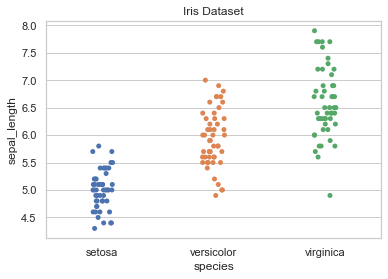

In [13]:
sns.set(style = 'whitegrid')
iris = sns.load_dataset('iris');
ax = sns.stripplot(x = 'species', y = 'sepal_length', data = iris);
plt.title('Iris Dataset')
plt.show()

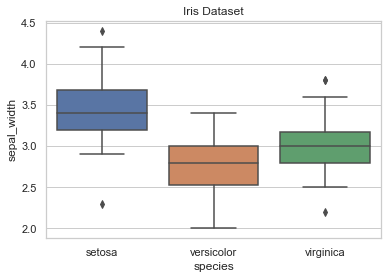

In [14]:
sns.boxplot(x = 'species', y = 'sepal_width', data = iris)
plt.title('Iris Dataset')
plt.show()

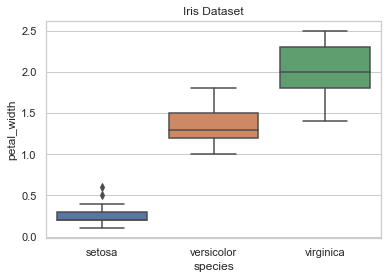

In [17]:
sns.boxplot(x = 'species', y = 'petal_width', data = iris)
plt.title('Iris Dataset')
plt.show()

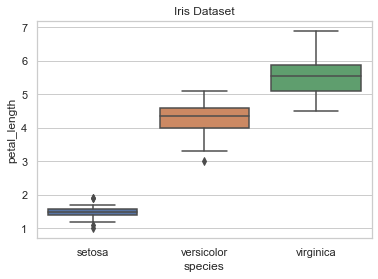

In [18]:
sns.boxplot(x = 'species', y = 'petal_length', data = iris)
plt.title('Iris Dataset')
plt.show()

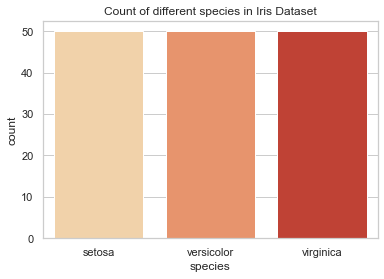

In [20]:
#countplot
sns.countplot(x='species', data=iris, palette='OrRd')
plt.title("Count of different species in Iris Dataset")
plt.show()

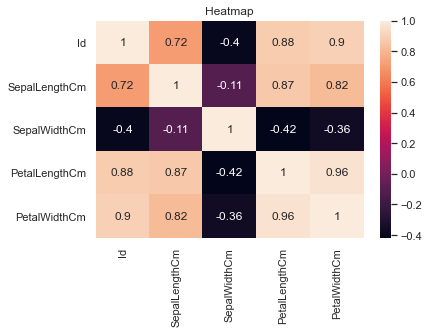

In [23]:
#heatmap
sns.heatmap(df.corr(), annot=True)
plt.title("Heatmap")
plt.show()

### Finding the optimum number of clusters

In [27]:
x= df.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter = 300, n_init=10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print('k:', i, 'wcss:', kmeans.inertia_)
#Appending the wcss to the list (kmeans.inertia_returns the wcss value for an initialized cluster)

k: 1 wcss: 281831.54466666654
k: 2 wcss: 70581.3808
k: 3 wcss: 31320.711199999994
k: 4 wcss: 17758.792503556186
k: 5 wcss: 11468.968747023802
k: 6 wcss: 7921.863473076923
k: 7 wcss: 5911.632365518538
k: 8 wcss: 4541.979023391812
k: 9 wcss: 3571.911095588236
k: 10 wcss: 2943.9331008403374


### Plotting the result into a line graph, allowing us to observe 'The elbow'

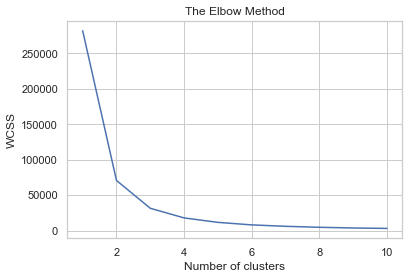

In [29]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can see the after 3 the drop in WCSS is minimal. So we chose 3 as our optimal number of clusters 

In [30]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters=3, init= 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

#Return a label for each data point based on the number of clusters
y_kmeans = kmeans.fit_predict(x)

In [31]:
#Predicting the Values 
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

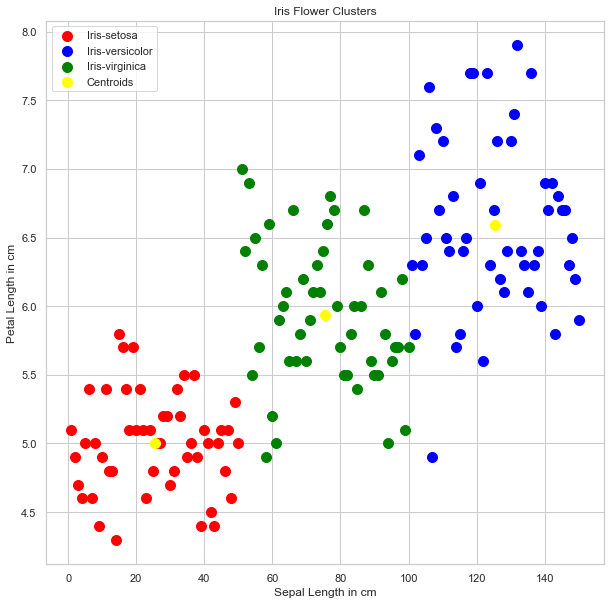

In [32]:
#Visualizing the Clusters

plt.figure(figsize = (10,10))
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1],s=100,c='red',label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1],s=100,c='blue',label='Iris-versicolor')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1],s=100,c='green',label='Iris-virginica')

#plotting the centroids of clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.legend()
plt.show()